# 데이터 표현과 특성 공학
## 범주형 변수
### 원 핫 인코딩(가변수)

In [7]:
import os
import mglearn
import pandas as pd
from IPython.display import display
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다.
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
    header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다.
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다.
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


[adult 데이터셋의 처음 다섯 개의 행(the first five rows of the adult dataset)]

#### 범주형 데이터 문자열 확인하기

In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [15]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [6]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


[head rows of the adult dataset after applying dummies characteristics]

In [16]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
# y = data_dummies['income_ <=50K'].values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[data dummies의 values 속성을 이용해 모든 열을 추출(Extract all columns by using values property of the data dummies)]

### 숫자로 표현된 범주형 특성

In [3]:
import pandas as pd
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


[문자열 범주형 특성과 숫자 특성을 가진 DataFrame]

In [15]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


[숫자 특성이 그대로 남은 DataFrame 데이터의 원-핫-인코딩 결과]

In [16]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


[DataFrame 데이터의 숫자와 문자열 특성이 원-핫-인코딩된 결과]

### OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기


In [18]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파일 배열을 반환합니다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


* scikit-learn의 출력은 DataFrame이 아니기 때문에 열 이름이 없습니다. 변환된 특성에 해당하는 원본 범주형 변수 이름을 얻으려면 get_feature_names 메서드를 사용합니다.

In [19]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [8]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False),
     ['workclass', 'education', 'gender', 'occupation'])])

* 다른 scikit-learn 변환기와 동일하게 ColumnTransformer 객체의 fit, transform 메서드를 사용할 수 있습니다. 이전처럼 선형 모델을 만들어보죠. 이번에는 연속형 변수의 스케일을 조정하겠습니다. train_test_split 함수에 넘파이 배열이 아닌 특성을 포함하고 있는 DataFrame을 전달할 수 있습니다. ColumnTransformer에 필요하므로 열 이름은 보존합니다.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다.
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [21]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

### make_column_transformer로 간편하게 ColumnTransformer 만들기(Create a ColumnTransformer easily with make_column_transformer)

In [24]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

### 구간 분할, 이산화 그리고 선형 모델, 트리 모델

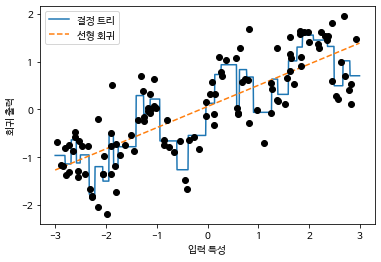

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [ ]:
[wave 데이터셋에 적용한 선형 회귀와 결정 트리의 비교]